# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters = 3
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

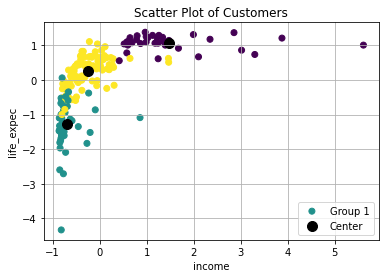

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
# I am interestedin "income" and "life_expec"
x1_index = 4
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

Text(0, 0.5, 'WCSS')

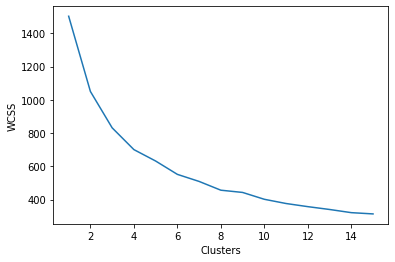

In [12]:
WCSSs = []
Ks = range(1,16)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init=30, init="random")
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)
plt.plot(Ks, WCSSs)
plt.xlabel("Clusters")
plt.ylabel("WCSS")

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

### I choose the number of clusters at 8 because the drop in WCSS drops by not as much after this point (WCSS is about 400) so elbow occurs.

In [13]:
kmeans = KMeans(n_clusters = 8, n_init =30, init = "random",
                random_state=42).fit(X_scaled)

In [14]:
kmeans

KMeans(init='random', n_init=30, random_state=42)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [15]:
pred = list(kmeans.predict(X_scaled))
from collections import defaultdict
dic = defaultdict(list)
for k, va in [(v,i) for i, v in enumerate(pred)]:
  dic[k].append(va)
country_cluster = {}
for key, value in dic.items():
  group = []
  for i in value:
    group.append(np.array(names["country"])[i])
  print(group)
  country_cluster[key] = group

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Niger', 'Pakistan', 'Senegal', 'Sudan', 'Tanzania', 'Timor-Leste', 'Uganda', 'Yemen', 'Zambia']
['Albania', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Georgia', 'Guyana', 'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Panama', 'Paraguay', 'Poland', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Suriname', 'Thailand', 'Tunisia', 'Turkmenistan', 'Ukraine', 'Vietnam']
['Algeria',

### Many developed countries are clustering together while developing countries are clustering together

In [16]:
country_cluster

{0: ['Afghanistan',
  'Angola',
  'Benin',
  'Burkina Faso',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Congo, Dem. Rep.',
  'Congo, Rep.',
  "Cote d'Ivoire",
  'Equatorial Guinea',
  'Eritrea',
  'Gabon',
  'Gambia',
  'Ghana',
  'Guinea',
  'Kenya',
  'Lao',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mozambique',
  'Niger',
  'Pakistan',
  'Senegal',
  'Sudan',
  'Tanzania',
  'Timor-Leste',
  'Uganda',
  'Yemen',
  'Zambia'],
 3: ['Albania',
  'Antigua and Barbuda',
  'Bahamas',
  'Barbados',
  'Belarus',
  'Belize',
  'Bhutan',
  'Bosnia and Herzegovina',
  'Bulgaria',
  'Cambodia',
  'Cape Verde',
  'Costa Rica',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Estonia',
  'Fiji',
  'Georgia',
  'Guyana',
  'Hungary',
  'Jordan',
  'Kyrgyz Republic',
  'Latvia',
  'Lebanon',
  'Libya',
  'Lithuania',
  'Macedonia, FYR',
  'Malaysia',
  'Maldives',
  'Mauritius',
  'Moldova',
  'Montenegro',
  'Panama',
  'Paraguay',
  'Poland',
  'Serbia',
 

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [17]:
df = pd.DataFrame(index=[0,1,2,3,4,5,6,7],columns=["cluster_number","mean_child_mort","mean_exports","mean_health","mean_imports","mean_income","mean_inflation","mean_life_expec","mean_total_fer","mean_gdpp"])
i=0
for key, value in dic.items():
  df.iloc[i]=[key,X.iloc[value].mean()[0],X.iloc[value].mean()[1],X.iloc[value].mean()[2],
         X.iloc[value].mean()[3],X.iloc[value].mean()[4],X.iloc[value].mean()[5],
         X.iloc[value].mean()[6],X.iloc[value].mean()[7],X.iloc[value].mean()[8]]
  i=i+1

In [18]:
df

,cluster_number,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
0,0,92.693939,30.469394,5.160606,38.3,3679.969697,11.292273,60.375758,5.288788,1782.575758
1,3,15.726087,53.341304,6.878043,60.234783,14955.0,3.974304,74.217391,1.959348,8963.826087
2,1,27.315789,26.554974,5.571579,32.833313,10129.210526,9.131211,72.163158,2.546053,5021.736842
3,7,4.295652,40.730435,10.513478,38.247826,40265.217391,1.334913,80.891304,1.81087,45417.391304
4,6,10.7,65.557143,3.281429,38.7,67171.428571,12.517143,76.928571,2.287143,34057.142857
5,5,86.535714,26.622857,9.945,59.714286,3651.714286,5.877857,56.342857,4.153571,2060.5
6,4,4.133333,176.0,6.793333,156.666667,64033.333333,2.468,81.433333,1.38,57566.666667
7,2,57.733333,33.5,5.14,30.566667,9786.666667,63.033333,67.366667,3.65,6160.0


# Q7.) Write an observation about the descriptive statistics.

In [19]:
pred = pd.DataFrame(kmeans.predict(X_scaled),columns=["group"])
df2 = pd.concat([pred, X], axis = 1)
df2

,group,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,3,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,3,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,1,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,2,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,3,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


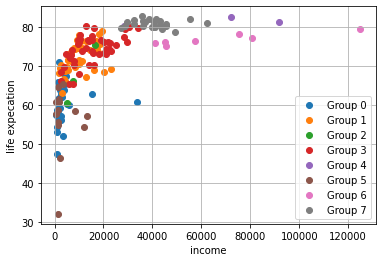

In [21]:
plt.scatter(df2[df2["group"]==0].income, df2[df2["group"]==0].life_expec)
plt.scatter(df2[df2["group"]==1].income, df2[df2["group"]==1].life_expec)
plt.scatter(df2[df2["group"]==2].income, df2[df2["group"]==2].life_expec)
plt.scatter(df2[df2["group"]==3].income, df2[df2["group"]==3].life_expec)
plt.scatter(df2[df2["group"]==4].income, df2[df2["group"]==4].life_expec)
plt.scatter(df2[df2["group"]==5].income, df2[df2["group"]==5].life_expec)
plt.scatter(df2[df2["group"]==6].income, df2[df2["group"]==6].life_expec)
plt.scatter(df2[df2["group"]==7].income, df2[df2["group"]==7].life_expec)
plt.xlabel("income")
plt.ylabel("life expecation")
plt.legend(["Group 0","Group 1","Group 2","Group 3","Group 4","Group 5","Group 6","Group 7"])
plt.grid()
plt.show()

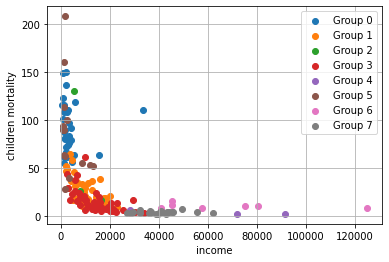

In [22]:
plt.scatter(df2[df2["group"]==0].income, df2[df2["group"]==0].child_mort)
plt.scatter(df2[df2["group"]==1].income, df2[df2["group"]==1].child_mort)
plt.scatter(df2[df2["group"]==2].income, df2[df2["group"]==2].child_mort)
plt.scatter(df2[df2["group"]==3].income, df2[df2["group"]==3].child_mort)
plt.scatter(df2[df2["group"]==4].income, df2[df2["group"]==4].child_mort)
plt.scatter(df2[df2["group"]==5].income, df2[df2["group"]==5].child_mort)
plt.scatter(df2[df2["group"]==6].income, df2[df2["group"]==6].child_mort)
plt.scatter(df2[df2["group"]==7].income, df2[df2["group"]==7].child_mort)
plt.xlabel("income")
plt.ylabel("children mortality")
plt.legend(["Group 0","Group 1","Group 2","Group 3","Group 4","Group 5","Group 6","Group 7"])
plt.grid()
plt.show()

### It is clear that the higher the income, the higher the life expectation (people live longer) and the higher the income, the lower children mortality.